In [ ]:
!pip install numpy
!pip install pandas

In [ ]:
import numpy as np
import pandas as pd

#Data Visualization
from sklearn.decomposition import PCA
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#Data Splitting
from sklearn.model_selection import train_test_split

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Oversampling
from imblearn.over_sampling import RandomOverSampler, SMOTE


In [ ]:
#Importing all required files
file_paths = [
    "/content/GSE18520.csv",
    "/content/GSE38666.csv",
    "/content/GSE6008.csv",
    "/content/GSE66957.csv",
    "/content/GSE69428.csv",
    "/content/GSE8841.csv",
    "/content/GSE9891.csv"
]

In [ ]:
# Read each CSV file into a separate DataFrame and rename the first column
for i, file_path in enumerate(file_paths, start=1):
    df_name = f'df{i}'  # Dynamically generate DataFrame name (e.g., df1, df2, ...)
    locals()[df_name] = pd.read_csv(file_path, dtype='unicode')

    #renaming the first column name so that all the files have a proper syntax
    locals()[df_name].rename(columns={locals()[df_name].columns[0]: 'gene'}, inplace=True)

In [ ]:
#Print the dataframes

df1
#df2
#df3
#df4
#df5
#df6
#df7

,gene,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,...,GSM462643,GSM462644,GSM462645,GSM462646,GSM462647,GSM462648,GSM462649,GSM462650,GSM462651,GSM462652
0,group,serous,serous,serous,serous,serous,serous,serous,serous,serous,...,control,control,control,control,control,control,control,control,control,control
1,DDR1,5362.04,1998.56,1198.56,4773.05,3512.54,1956.38,6097.4,2449.74,1477.7,...,869.705,1573.5,895.644,1019.53,2106.86,2764.01,2027.65,2175.86,3073.06,2748.27
2,RFC2,309.085,223.619,255.617,311.391,261.382,250.646,186.88,287.35,274.902,...,634.568,767.856,537.466,590.129,224.665,140.162,154.077,240.65,170.265,206.474
3,HSPA6,167.941,154.186,213.864,176.065,153.716,169.089,169.373,194.446,168.071,...,527.915,286.869,297.528,295.24,97.6766,71.0357,116.246,85.5578,106.737,74.3232
4,PAX8,3018.71,2635.01,1777.83,4241.07,2450.09,2050.59,2640.27,2906.28,1625.22,...,579.585,584.242,854.654,574.547,353.336,661.082,549.585,378.661,302.176,389.142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44536,GAPDH,8961.87,6589.24,5272.85,7762.2,2823.11,4604.58,8508.69,5932.28,5046.82,...,2227.44,3420.31,1459.14,1362.51,3009.15,2810.12,3063.87,3236.67,4712.72,3288.62
44537,STAT1,4978.63,4520.94,2589.09,2325.92,3318.96,4191.35,3950.52,2955.36,3402.09,...,2367.8,4300.43,3036.44,2692.44,2081.98,1925.75,1267.81,2789.61,2098.1,1647.85
44538,STAT1,32.4625,38.9699,29.1752,26.2258,34.1424,32.7756,42.0335,27.1575,29.9615,...,28.8962,31.469,32.2443,26.2464,40.6068,43.859,35.8824,54.2064,41.1359,36.1308
44539,STAT1,1083.55,1107.96,1092.53,573.999,1217.52,1262.18,1340.46,1242.74,991.895,...,789.44,1597.77,916.099,901.684,355.883,289.654,298.037,417.218,270.834,335.444


# **Exploratory Data Analysis (EDA)**

In [ ]:
#finding the unique values in the gene group
for i in range(1,8):
    df = f'df{i}'

    #Finding the unique gene group names present in each data frame
    unique_values = locals()[df].iloc[0, 1:].unique()
    print(f"Unique values in {df}: \n{unique_values}\n")

    #counting the number of time each unique gene group is present in the dataframe
    values = locals()[df].iloc[0, 1:].value_counts()
    print(f"Unique values in {df}: \n{values}\n")

Unique values in df1: 
['serous' 'control']

Unique values in df1: 
0
serous     53
control    10
Name: count, dtype: int64

Unique values in df2: 
['control' 'case']

Unique values in df2: 
0
case       25
control    20
Name: count, dtype: int64

Unique values in df3: 
['clear cell' 'endometrioid' 'mucinous' 'serous' 'control']

Unique values in df3: 
0
serous          41
endometrioid    37
mucinous        13
clear cell       8
control          4
Name: count, dtype: int64

Unique values in df4: 
['control' 'case']

Unique values in df4: 
0
case       57
control    12
Name: count, dtype: int64

Unique values in df5: 
['serous' 'control' nan]

Unique values in df5: 
0
serous     10
control    10
Name: count, dtype: int64

Unique values in df6: 
['serous' 'mucinous' 'endometrioid' 'clear cell' 'cler cell']

Unique values in df6: 
0
serous          31
mucinous        17
endometrioid    17
clear cell      15
cler cell        1
Name: count, dtype: int64

Unique values in df7: 
['serous' 'en

In [ ]:
#replacing the spelling mistake
df6 = df6.replace({"cler cell" : "clear cell"})

In [ ]:
#Identifying the row with adeno group as it has only one row
rows_with_adeno = df7.T[df7.T.iloc[:, 0] == 'adeno']
rows_with_adeno


,0,1,2,3,4,5,6,7,8,9,...,44483,44484,44485,44486,44487,44488,44489,44490,44491,44492
GSM249948,adeno,9.74391,7.24323,6.02091,9.88247,3.06783,8.70447,5.14522,4.69507,9.09677,...,13.23148,10.66857,11.83412,13.37181,12.70808,13.15143,11.20076,5.17024,8.60709,8.45606


In [ ]:
#Dropping the above identified row
df7 = df7.drop('GSM249948', axis=1)

# **Data Preprocessing**

In [ ]:
#converting the groups to numeric values
df_group1 = df1.replace({"control":0,"serous":2.0})
df_group2 = df2.replace({"control":0,"case":5})
df_group3 = df3.replace({"control":0,"endometrioid":1,"serous":2,"mucinous":3,"clear cell":4})
df_group4 = df4.replace({"control":0,"case":5})
df_group5 = df5.replace({"control":0,"serous":2,})
df_group6 = df6.replace({"control":0,"endometrioid":1,"serous":2,"mucinous":3,"clear cell":4})
df_group7 = df7.replace({"endometrioid":1,"serous":2,"adeno":3})

In [ ]:
#converting the object data type to float except for gene column
for i, file_path in enumerate(file_paths, start=1):
    df_group = f'df_group{i}'  # Dynamically generate DataFrame name (e.g., df1, df2, ...)

    # Convert all columns to float except the 'gene' column
    numeric_cols = locals()[df_group].columns.difference(['gene'])
    locals()[df_group][numeric_cols] = locals()[df_group][numeric_cols].astype(float)

In [ ]:
# Printing the Dataframe_group

df_group1
# df_group2
# df_group3
# df_group4
# df_group5
# df_group6
#df_group7

,gene,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,...,GSM462643,GSM462644,GSM462645,GSM462646,GSM462647,GSM462648,GSM462649,GSM462650,GSM462651,GSM462652
0,group,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,DDR1,5362.0400,1998.5600,1198.5600,4773.0500,3512.5400,1956.3800,6097.4000,2449.7400,1477.7000,...,869.7050,1573.500,895.6440,1019.5300,2106.8600,2764.0100,2027.6500,2175.8600,3073.0600,2748.2700
2,RFC2,309.0850,223.6190,255.6170,311.3910,261.3820,250.6460,186.8800,287.3500,274.9020,...,634.5680,767.856,537.4660,590.1290,224.6650,140.1620,154.0770,240.6500,170.2650,206.4740
3,HSPA6,167.9410,154.1860,213.8640,176.0650,153.7160,169.0890,169.3730,194.4460,168.0710,...,527.9150,286.869,297.5280,295.2400,97.6766,71.0357,116.2460,85.5578,106.7370,74.3232
4,PAX8,3018.7100,2635.0100,1777.8300,4241.0700,2450.0900,2050.5900,2640.2700,2906.2800,1625.2200,...,579.5850,584.242,854.6540,574.5470,353.3360,661.0820,549.5850,378.6610,302.1760,389.1420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44536,GAPDH,8961.8700,6589.2400,5272.8500,7762.2000,2823.1100,4604.5800,8508.6900,5932.2800,5046.8200,...,2227.4400,3420.310,1459.1400,1362.5100,3009.1500,2810.1200,3063.8700,3236.6700,4712.7200,3288.6200
44537,STAT1,4978.6300,4520.9400,2589.0900,2325.9200,3318.9600,4191.3500,3950.5200,2955.3600,3402.0900,...,2367.8000,4300.430,3036.4400,2692.4400,2081.9800,1925.7500,1267.8100,2789.6100,2098.1000,1647.8500
44538,STAT1,32.4625,38.9699,29.1752,26.2258,34.1424,32.7756,42.0335,27.1575,29.9615,...,28.8962,31.469,32.2443,26.2464,40.6068,43.8590,35.8824,54.2064,41.1359,36.1308
44539,STAT1,1083.5500,1107.9600,1092.5300,573.9990,1217.5200,1262.1800,1340.4600,1242.7400,991.8950,...,789.4400,1597.770,916.0990,901.6840,355.8830,289.6540,298.0370,417.2180,270.8340,335.4440


In [ ]:
#grouping the values of same gene name for a given gene type
for i, file_path in enumerate(file_paths, start=1):
    df_sum = f'df_sum{i}'
    df_group = f'df_group{i}'
    locals()[df_sum] = locals()[df_group].copy()

    locals()[df_sum] = locals()[df_group].groupby('gene',as_index=False).sum(numeric_only=True)

<ipython-input-13-8e6a08cc5f79>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  locals()[df_sum] = locals()[df_group].groupby('gene',as_index=False).sum(numeric_only=True)
<ipython-input-13-8e6a08cc5f79>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  locals()[df_sum] = locals()[df_group].groupby('gene',as_index=False).sum(numeric_only=True)


In [ ]:
#Printing the dataframes after grouping the common genes
df_sum1
# df_sum2
# df_sum3
# df_sum4
# df_sum5
# df_sum6
# df_sum7

,gene,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,...,GSM462643,GSM462644,GSM462645,GSM462646,GSM462647,GSM462648,GSM462649,GSM462650,GSM462651,GSM462652
0,A1BG,280.7350,217.5000,198.5080,275.7590,168.9530,235.1300,197.9610,239.9840,173.4500,...,170.8560,181.3260,155.7800,150.8690,195.8580,186.9650,181.8770,192.5710,180.7200,207.1920
1,A1BG-AS1,89.8260,75.9745,58.5645,82.2521,97.8292,63.8955,107.3240,100.0370,66.3037,...,80.2741,83.1807,93.7389,90.1446,126.4620,126.5560,113.3890,88.5847,99.6519,110.0600
2,A1CF,176.7829,164.6828,337.5400,130.8519,175.9808,263.2934,184.9879,171.9508,194.4875,...,200.1219,177.9119,335.0319,232.9520,133.4421,84.9702,128.4032,99.6826,91.9352,100.2901
3,A2M,3141.8920,3433.0450,3658.8420,2479.3050,2940.7560,2896.5200,2461.5950,3319.2880,3396.1060,...,3726.3950,3873.1800,4215.3770,2658.1100,906.3733,449.0169,673.0567,750.1727,1011.7170,656.5704
4,A2M-AS1,88.4814,63.0676,72.5304,106.2790,47.4728,83.6298,63.3908,87.6151,97.3535,...,91.0563,82.6404,76.8411,59.4032,116.3020,153.1110,150.5620,87.8718,130.1330,154.2050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21435,ZYX,487.6720,416.2448,538.6136,616.5083,483.4271,501.0783,436.0871,554.1130,843.6285,...,484.1358,424.3258,448.8953,485.0395,588.9574,484.3648,528.9968,496.5585,506.6878,475.4584
21436,ZZEF1,945.0530,754.3840,640.4176,1438.2220,759.0360,821.5450,1330.9250,755.4323,693.0680,...,985.6160,928.8257,1109.3230,883.0320,1073.2490,805.9300,908.2765,925.6840,699.6518,904.0640
21437,ZZZ3,1746.9570,1158.6110,884.2800,1793.8400,1222.2760,1250.6230,1359.7970,1012.0270,1048.7360,...,756.0060,726.9530,648.6650,726.5780,1033.3780,1302.0300,1219.0150,1083.5590,1256.2710,1198.7530
21438,group,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
#Joining all the files to have a single file with all the common gene names
dfs = [df_sum1, df_sum2, df_sum3, df_sum4, df_sum5, df_sum6, df_sum7]

# Join the first two DataFrames
df_join = pd.merge(dfs[0], dfs[1], on='gene', how='inner', suffixes=('_1', '_2'))

# Join the result with the next DataFrames iteratively
for i, df_sum in enumerate(dfs[2:], start=3):
    df_join = pd.merge(df_join, df_sum, on='gene', how='inner', suffixes=(f'_{i-1}', f'_{i}'))

# The final merged_df will contain only the common genes

In [ ]:
#The dataframe after joining all the files
df_join

,gene,GSM461348,GSM461349,GSM461350,GSM461351,GSM461352,GSM461353,GSM461354,GSM461355,GSM461356,...,GSM249992,GSM249993,GSM249994,GSM249995,GSM249996,GSM249997,GSM249998,GSM249999,GSM250000,GSM250001
0,A2M,3141.8920,3433.0450,3658.8420,2479.3050,2940.7560,2896.5200,2461.5950,3319.2880,3396.1060,...,14.05921,15.59335,16.48146,12.02491,14.25803,15.66449,13.72889,11.98143,13.94068,14.33076
1,AADAC,190.6530,72.2087,142.4020,200.4990,538.3880,159.9180,103.8530,85.8594,85.8860,...,5.76186,6.42064,7.88898,5.00152,6.35941,7.28388,7.99426,6.40502,4.86977,4.54976
2,ABCA1,1695.9346,1574.7250,1152.5600,1317.5419,1541.2066,1546.4930,1932.1959,915.5413,1404.3429,...,27.06441,23.36156,23.03577,24.48280,22.29566,25.69582,20.49670,22.78758,24.19795,24.64981
3,ABCA11P,621.6490,601.5200,709.5570,267.8080,487.0180,583.0960,492.4180,633.1800,742.6820,...,5.25138,4.56220,5.84897,5.86182,6.28444,5.99057,5.12539,5.56595,6.08259,4.76664
4,ABCA2,392.7400,438.7586,494.3475,370.9594,454.1741,474.4294,386.2518,462.9476,440.0063,...,14.39536,15.14650,15.84900,16.31922,16.91969,14.05073,16.77941,16.42035,14.04660,14.47721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3836,ZNF862,848.2310,708.4600,795.0850,866.6610,760.4906,729.5870,1433.2210,758.6020,1177.1020,...,14.68763,16.85802,14.26430,14.62143,14.35300,15.15563,16.13790,15.97960,13.18765,14.23560
3837,ZNHIT1,878.0710,1292.7800,1040.6800,1375.4700,898.5440,685.0130,1382.8000,1367.9100,888.9830,...,9.34129,9.78201,9.61417,8.95810,8.80329,9.72904,9.80973,10.12760,8.79940,9.29515
3838,ZSCAN16,618.3410,524.1870,640.9030,488.3400,604.3300,659.8000,527.3060,575.3840,667.6670,...,5.52821,6.96655,6.03232,7.70005,5.22592,6.66380,5.34788,6.01728,5.86727,6.95231
3839,ZXDB,454.7917,329.0819,462.2445,723.5445,399.2189,533.2284,431.6173,324.8762,454.4080,...,18.17810,17.30734,17.28294,18.91804,17.66949,17.66083,19.50050,18.24386,17.47987,16.08883


# **Data Transformation**

In [ ]:
#Transposing the dataframes such that the gene types become the rows and gene names become the columns

df_transpose = df_join.T.reset_index()

#making the gene names the column headers
df_transpose.columns = df_transpose.iloc[0]

# Drop the first row (since it's now the column headers)
df_transpose = df_transpose.iloc[1:].reset_index(6drop=True)

# Move the last column to the second position
cols = df_transpose.columns.tolist()
col_to_move = cols[-1]
cols = [col for col in cols if col != col_to_move]
new_cols = cols[:1] + [col_to_move] + cols[1:]
df_transpose = df_transpose[new_cols]

In [ ]:
#The final dataframe
df_transpose    `

,gene,group,A2M,AADAC,ABCA1,ABCA11P,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF702P,ZNF768,ZNF787,ZNF83,ZNF84,ZNF85,ZNF862,ZNHIT1,ZSCAN16,ZXDB
0,GSM461348,2.0,3141.892,190.653,1695.9346,621.649,392.74,91.775,177.62,78.7854,...,41.8994,311.762,327.854,495.567,704.221,298.284,848.231,878.071,618.341,454.7917
1,GSM461349,2.0,3433.045,72.2087,1574.725,601.52,438.7586,191.119,265.186,81.798,...,71.023,227.679,373.74,371.55,311.292,514.593,708.46,1292.78,524.187,329.0819
2,GSM461350,2.0,3658.842,142.402,1152.56,709.557,494.3475,179.327,360.5479,52.5288,...,49.8132,203.898,357.164,301.965,259.835,521.886,795.085,1040.68,640.903,462.2445
3,GSM461351,2.0,2479.305,200.499,1317.5419,267.808,370.9594,511.03,262.0655,103.2429,...,32.6867,389.399,299.981,630.289,377.075,545.796,866.661,1375.47,488.34,723.5445
4,GSM461352,2.0,2940.756,538.388,1541.2066,487.018,454.1741,90.7618,219.6622,71.9857,...,130.442,142.984,265.498,815.698,340.435,657.523,760.4906,898.544,604.33,399.2189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,GSM249997,2.0,15.66449,7.28388,25.69582,5.99057,14.05073,6.0227,8.10064,11.37046,...,4.10795,6.06979,9.8409,8.66136,17.39934,13.15991,15.15563,9.72904,6.6638,17.66083
670,GSM249998,2.0,13.72889,7.99426,20.4967,5.12539,16.77941,6.61596,9.20781,9.61893,...,3.92014,5.98124,10.76044,9.57704,15.98955,12.37259,16.1379,9.80973,5.34788,19.5005
671,GSM249999,2.0,11.98143,6.40502,22.78758,5.56595,16.42035,6.08838,8.57285,10.27968,...,4.63268,6.31095,11.01123,8.74259,16.7891,12.31179,15.9796,10.1276,6.01728,18.24386
672,GSM250000,2.0,13.94068,4.86977,24.19795,6.08259,14.0466,5.52563,9.82571,9.35515,...,4.17507,5.81675,11.04472,7.95087,16.42484,13.00387,13.18765,8.7994,5.86727,17.47987


# **Data Visualization**

In [ ]:
# Assuming gene expression data starts from column 2
X = df_transpose.iloc[:, 2:]

# Apply PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

#Scatter plot
fig = px.scatter(reduced_data, x=0, y=1, color=df_transpose['group'], labels={'0': 'Principal Component 1', '1': 'Principal Component 2'})
fig.update_layout(width=1200, height=800)  # Set the width and height
fig.show()

# Interpretation:
# If points of the same color (group) are close together, it suggests that samples within that group have similar gene expression profiles.
# If points of different colors are far apart, it indicates differences in gene expression patterns between groups.

In [ ]:
#Box plot for a specific gene name

fig = px.box(df_transpose, x='group', y='A2M', color='group',
             title='Box Plot of Gene A2M across Groups',
             labels={'group': 'Group', 'A2M': 'Gene Expression'})

fig.update_layout(width=1200, height=800)  # Set the width and height

# Show the interactive plot
fig.show()


# Interpretation:
# The box plot provides a visual summary of the distribution of gene expression for 'A2M' across different groups.
# Differences in the median or spread of the gene expression values among groups can be observed.
# Outliers, if any, are shown as individual points outside the whiskers.

In [ ]:
#Bar graph depicting the occurences of each group

group_counts = df_transpose['group'].value_counts().reset_index()
group_counts.columns = ['Group', 'Count']

fig = px.bar(group_counts, x='Group', y='Count', color='Count',
             labels={'Count': 'Occurrences'},
             title='Occurrences of Each Group',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_title='Group', yaxis_title='Count')
fig.update_layout(width=1200, height=800)  # Set the width and height
fig.show()

# Interpretation:
# This visualization provides a quick overview of the distribution of groups in the dataset and allows for easy comparison of the occurrence of each group

In [ ]:
fig = go.Figure()

# Add filled area traces for each gene
for gene in ['A2M', 'AADAC', 'ABCA1']:
    fig.add_trace(go.Scatter(x=df_transpose.index, y=df_transpose[gene],
                             mode='lines', fill='tozeroy', name=gene))

# Update layout
fig.update_layout(title='Gene Expression Trends over Samples',
                  xaxis=dict(title='Sample Index'),
                  yaxis=dict(title='Gene Expression'),
                  legend=dict(title='Genes'),
                  width=1200, height=800)

fig.show()

# Interpretation:
# The graph shows the gene expression trends over different samples for three genes: A2M, AADAC, and ABCA1.
# Each line represents the expression levels of a specific gene, and the filled area below each line indicates the range of expression values.

# **Data Splitting**

In [ ]:
X = df_transpose.drop(['gene','group'], axis=1)#dropping even the gene column, since all the values are unique and it doesn't help the model
y = df_transpose['group'] #identifying the target column

In [ ]:
#Splitting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_Train", X_train.shape)
print("X_Test", X_test.shape)
print("Y_Train", y_train.shape)
print("Y_Test", y_test.shape)

X_Train (539, 3840)
X_Test (135, 3840)
Y_Train (539,)
Y_Test (135,)


# **Feature Scaling**

In [ ]:
#Perform scaling to ensure that all features contribute equally to the model
#We have used Standard Scaling(Z-score normalization) which ensures that mean is 0 and SD is 1

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Now, X_train_scaled contains the scaled features
X_train_scaled.shape


(539, 3840)

In [ ]:
# Transform the test data using the same test scaler to ensure that scaling is consistent
X_test_scaled = scaler.transform(X_test)
print(X_test_scaled.shape,"\n")
X_test_scaled

(135, 3840) 



array([[-0.34001177, -0.14677308, -0.35577677, ..., -0.33009668,
        -0.29964323, -0.34434765],
       [-0.34464069, -0.14592142, -0.36051119, ..., -0.33022468,
        -0.3029153 , -0.37563778],
       [-0.3392437 , -0.14585514, -0.3539631 , ..., -0.32842859,
        -0.30166352, -0.34417698],
       ...,
       [-0.34799846, -0.15275109, -0.37726453, ..., -0.34912526,
        -0.30731421, -0.37892484],
       [-0.34105899, -0.14915595, -0.35274359, ..., -0.32686356,
        -0.30335689, -0.33844853],
       [-0.33898868, -0.14386858, -0.35612208, ..., -0.32808499,
        -0.29796943, -0.3374461 ]])

# **Principal Component Analysis (PCA)**

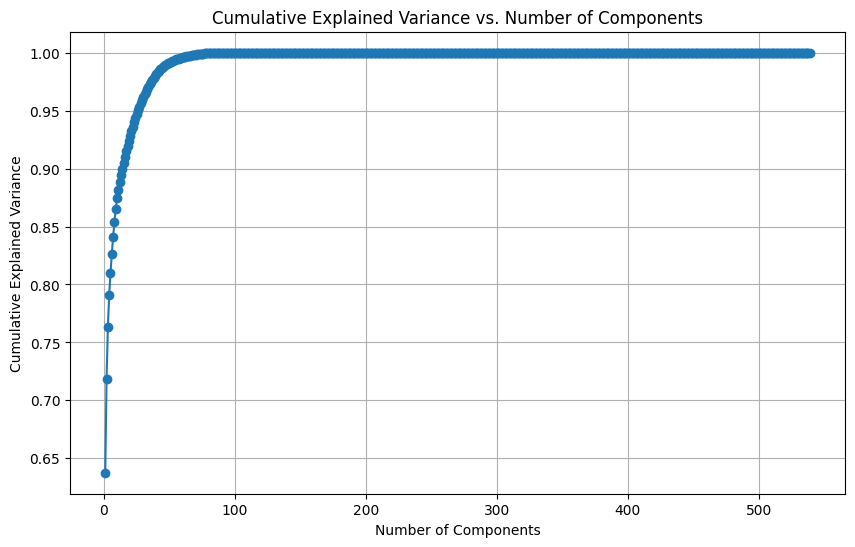

In [ ]:
#plotting the cumulative variance vs number of components graph to see the number of components that can be used for pca


# Initialize PCA
pca = PCA(n_components=539)  # Set the initial number of components to the maximum

# Fit on the scaled training data
pca.fit(X_train_scaled)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

#Cumulative explained variance increases as you include more components.
#Decide on the number of components based on the percentage of total variance you want to retain



In [ ]:

# Choose the number of components based on the cumulative explained variance
desired_variance_ratio = 0.99  # Considering the maximum possible value for dimensionality reduction
#selecting the number of components based on the variance
n_components = next(i for i, cum_var in enumerate(cumulative_explained_variance, 1) if cum_var >= desired_variance_ratio)
n_components

# Re-fit PCA with the selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled) #Performing PCA for the train data
X_test_pca = pca.transform(X_test_scaled) # Performing PCA for test data using the measures of the train data


In [ ]:
print("The train data PCA\n\n",X_train_pca,"\n\nThe new shape of the train dataset is",X_train_pca.shape)
print("\n\nThe test data PCA\n\n",X_test_pca,"\n\nThe new shape of the test dataset is",X_test_pca.shape)

The train data PCA

 [[-1.85888509e+01 -1.02593724e+00  1.24160497e+00 ...  8.11196203e-02
  -1.75727265e-02 -5.57581516e-02]
 [-1.86871414e+01 -1.11682192e+00  1.20856591e+00 ...  6.71544562e-02
  -1.09019071e-02 -6.37594866e-02]
 [ 8.30507289e+01  3.63221442e+01 -2.50456143e+01 ... -1.01744676e+01
   4.71151345e+00  4.90654228e+00]
 ...
 [-1.86049923e+01 -1.03640275e+00  1.27419561e+00 ...  3.99371138e-02
  -5.08712137e-03 -8.06373239e-02]
 [-1.89713775e+01 -1.02669290e+00  1.29405888e+00 ...  5.89467358e-02
   3.14479223e-02 -8.33393149e-03]
 [ 1.77254093e+02  9.83883189e+00  7.01591346e+01 ...  1.79632978e-01
  -2.63530396e-01 -8.75126186e-01]] 

The new shape of the train dataset is (539, 48)


The test data PCA

 [[-1.90322383e+01 -1.06329342e+00  1.27609046e+00 ...  2.27120012e-02
   2.30993811e-02 -9.87585270e-03]
 [-1.99200081e+01 -1.35543897e+00  9.90456065e-01 ... -1.75316214e-02
   3.46340067e-03 -4.90954777e-03]
 [-1.89661468e+01 -1.01399583e+00  1.30709706e+00 ...  4.8906

# **Oversampling**

In [ ]:
#Oversampling of the data to handle the imbalance of the data distribution.
#We are using the SMOT(Synthetic Minority Over Sampling Technique) that generates minority data by interpolating between the existing samples


# Choose the oversampling technique (RandomOverSampler or SMOTE)
oversampler = SMOTE(sampling_strategy={0.0:403, 1.0: 403, 2.0: 403, 3.0: 403, 4.0: 403, 5.0: 403}, random_state=42)

y_train = y_train.astype('int')
# Apply oversampling to X_train_pca and y_train
X_train_pca_oversampled, y_train_oversampled = oversampler.fit_resample(X_train_pca, y_train)


In [ ]:
X_train_pca_oversampled.shape

(2418, 48)

In [ ]:
#The target column is now having a balance data compared to the previous data
print("The original unique values in the target column\n",df_transpose['group'].value_counts())

y_train_oversampled_series = pd.Series(y_train_oversampled)
print("\nThe unique values in the target column after resampling\n",y_train_oversampled_series.value_counts())



The original unique values in the target column
 group
2.0    403
5.0     82
1.0     70
0.0     65
3.0     30
4.0     24
Name: count, dtype: int64

The unique values in the target column after resampling
 group
5    403
0    403
2    403
1    403
3    403
4    403
Name: count, dtype: int64


In [ ]:
#Sampling the test data just as a workaround since the test data is small
y_test=y_test.astype('int')

oversampler1 = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=3)

#Applying oversampling to X_test_pca and y_test
X_test_pca_oversampled, y_test_oversampled = oversampler1.fit_resample(X_test_pca, y_test)

y_test_oversampled.value_counts()


,count
group,
2,68
0,68
4,68
5,68
1,68
3,68


In [ ]:
X_test_pca_oversampled.shape


(408, 48)

In [ ]:
y_test_oversampled.shape

(408,)

# **Prediction Models**

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix



In [ ]:
# Initialize the KNeighborsClassifier model
knn_model = KNeighborsClassifier()

In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_neighbors': [3,5,7,9,10,12,15],  # Adjust the number of neighbors as needed
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_pca_oversampled, y_train_oversampled)

print("KNN\n\n")

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to predict on the test set
y_pred = grid_search.predict(X_test_pca_oversampled)

# Evaluate the model on the test set
accuracy_knn = accuracy_score(y_test_oversampled, y_pred)
print(f"Accuracy on Test Set: {accuracy_knn:.4f}")
# Converting numeric labels to category names in the report
label_mapping = {
    0: 'control',
    1: 'endometrioid',
    2: 'serous',
    3: 'mucinous',
    4: 'clear cell',
    5: 'case'
}

# Replace numeric labels with category names
y_test_oversampled_category_names = [label_mapping[label] for label in y_test_oversampled]
y_pred_category_names = [label_mapping[label] for label in y_pred]

# Print classification report with category names
print("\nClassification Report:")
print(classification_report(y_test_oversampled_category_names, y_pred_category_names))



KNN


Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Accuracy on Test Set: 0.7819

Classification Report:
              precision    recall  f1-score   support

        case       1.00      0.97      0.99        68
  clear cell       0.60      0.81      0.69        68
     control       0.96      1.00      0.98        68
endometrioid       0.59      0.68      0.63        68
    mucinous       0.75      0.53      0.62        68
      serous       0.91      0.71      0.79        68

    accuracy                           0.78       408
   macro avg       0.80      0.78      0.78       408
weighted avg       0.80      0.78      0.78       408



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

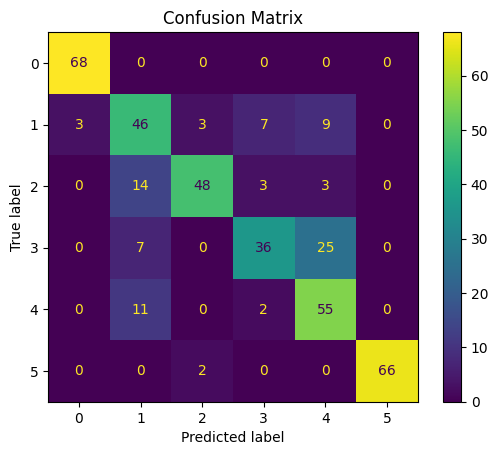

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_oversampled, y_pred, labels=grid_search.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_).plot()
plt.title("Confusion Matrix")


**XGBoost**

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, classification_report

!pip install matplotlib scikit-learn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(y_train_oversampled.unique()), random_state=42)


In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Define the evaluation metric (you can adjust this based on your task)
scoring_metric = make_scorer(accuracy_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scoring_metric, cv=5, n_jobs=-1)

# Fit the model to the oversampled training data
grid_search.fit(X_train_pca_oversampled, y_train_oversampled)

print("XGBoost\n\n")
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to predict on the test set
y_pred = grid_search.predict(X_test_pca_oversampled)

# Evaluate the model on the test set
accuracy_xgb = accuracy_score(y_test_oversampled, y_pred)
print(f"Accuracy on Test Set: {accuracy_xgb:.4f}")

# Converting numeric labels to category names in the report
label_mapping = {
    0: 'control',
    1: 'endometrioid',
    2: 'serous',
    3: 'mucinous',
    4: 'clear cell',
    5: 'case'
}

# Replace numeric labels with category names
y_test_oversampled_category_names = [label_mapping[label] for label in y_test_oversampled]
y_pred_category_names = [label_mapping[label] for label in y_pred]

# Print classification report with category names
print("\nClassification Report:")
print(classification_report(y_test_oversampled_category_names, y_pred_category_names))


XGBoost


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy on Test Set: 0.7304

Classification Report:
              precision    recall  f1-score   support

        case       0.92      1.00      0.96        68
  clear cell       0.73      0.40      0.51        68
     control       0.97      0.84      0.90        68
endometrioid       0.43      0.65      0.51        68
    mucinous       0.97      0.57      0.72        68
      serous       0.66      0.93      0.77        68

    accuracy                           0.73       408
   macro avg       0.78      0.73      0.73       408
weighted avg       0.78      0.73      0.73       408



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

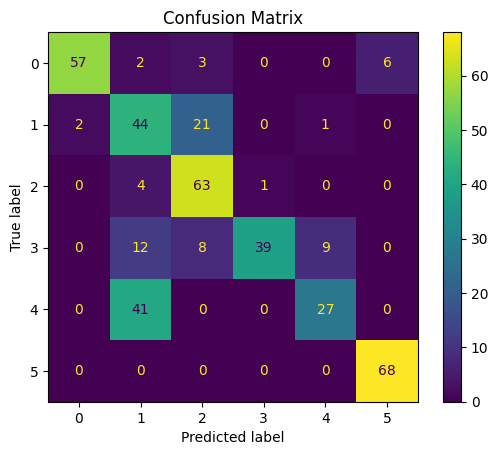

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_oversampled, y_pred, labels=grid_search.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_).plot()
plt.title("Confusion Matrix")

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree

In [ ]:
# Define the DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_pca_oversampled, y_train_oversampled)

print("Decision Tree\n\n")
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

# Use the best model to predict on the test set
y_pred = best_model.predict(X_test_pca_oversampled)

# Evaluate the model on the test set
accuracy_decision = accuracy_score(y_test_oversampled, y_pred)
print(f"Accuracy on Test Set: {accuracy_decision:.4f}")

# Converting numeric labels to category names in the report
label_mapping = {
    0: 'control',
    1: 'endometrioid',
    2: 'serous',
    3: 'mucinous',
    4: 'clear cell',
    5: 'case'
}
# Replace numeric labels with category names
y_test_oversampled_category_names = [label_mapping[label] for label in y_test_oversampled]
y_pred_category_names = [label_mapping[label] for label in y_pred]

# Print classification report with category names
print("\nClassification Report:")
print(classification_report(y_test_oversampled_category_names, y_pred_category_names))

Decision Tree


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy on Test Set: 0.6397

Classification Report:
              precision    recall  f1-score   support

        case       0.86      0.99      0.92        68
  clear cell       0.64      0.51      0.57        68
     control       0.90      0.68      0.77        68
endometrioid       0.38      0.46      0.41        68
    mucinous       0.90      0.41      0.57        68
      serous       0.49      0.79      0.60        68

    accuracy                           0.64       408
   macro avg       0.69      0.64      0.64       408
weighted avg       0.69      0.64      0.64       408



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

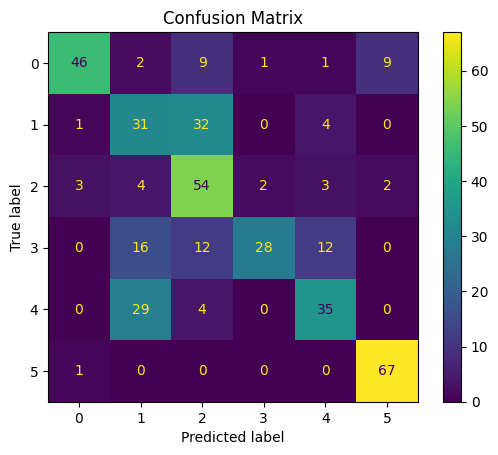

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_oversampled, y_pred, labels=grid_search.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_).plot()
plt.title("Confusion Matrix")

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the LogisticRegression model
logreg_model = LogisticRegression(random_state=42)


In [ ]:
# Train the model
logreg_model.fit(X_train_pca_oversampled, y_train_oversampled)

# Use the model to predict on the test set
y_pred = logreg_model.predict(X_test_pca_oversampled)

print("Logistic Regression\n\n")
# Evaluate the model
accuracy_logistic = accuracy_score(y_test_oversampled, y_pred)
print(f"Accuracy on Test Set: {accuracy_logistic:.4f}")

# Converting numeric labels to category names in the report
label_mapping = {
    0: 'control',
    1: 'endometrioid',
    2: 'serous',
    3: 'mucinous',
    4: 'clear cell',
    5: 'case'
}

# Replace numeric labels with category names
y_test_oversampled_category_names = [label_mapping[label] for label in y_test_oversampled]
y_pred_category_names = [label_mapping[label] for label in y_pred]

# Print classification report with category names
print("Classification Report:")
print(classification_report(y_test_oversampled_category_names, y_pred_category_names))


Logistic Regression


Accuracy on Test Set: 0.5490
Classification Report:
              precision    recall  f1-score   support

        case       0.93      1.00      0.96        68
  clear cell       0.21      0.19      0.20        68
     control       1.00      0.54      0.70        68
endometrioid       0.26      0.56      0.35        68
    mucinous       0.45      0.15      0.22        68
      serous       0.88      0.85      0.87        68

    accuracy                           0.55       408
   macro avg       0.62      0.55      0.55       408
weighted avg       0.62      0.55      0.55       408



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

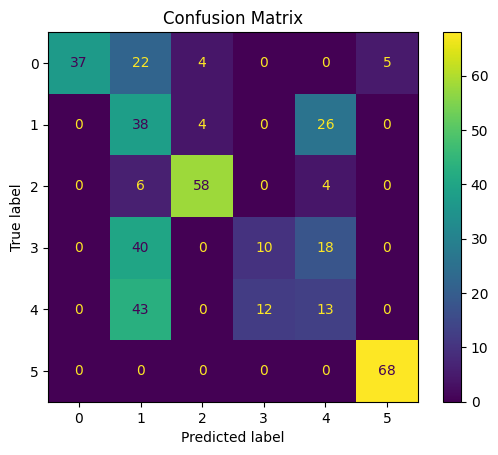

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_oversampled, y_pred, labels=grid_search.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_).plot()
plt.title("Confusion Matrix")

**SVM**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the SVC model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

In [ ]:
# Train the model
svm_model.fit(X_train_pca_oversampled, y_train_oversampled)

# Use the model to predict on the test set
y_pred = svm_model.predict(X_test_pca_oversampled)

print("SVM\n\n")
# Evaluate the model
accuracy_svm = accuracy_score(y_test_oversampled, y_pred)
print(f"Accuracy on Test Set: {accuracy_svm:.4f}")

# Converting numeric labels to category names in the report
label_mapping = {
    0: 'control',
    1: 'endometrioid',
    2: 'serous',
    3: 'mucinous',
    4: 'clear cell',
    5: 'case'
}

# Replace numeric labels with category names
y_test_oversampled_category_names = [label_mapping[label] for label in y_test_oversampled]
y_pred_category_names = [label_mapping[label] for label in y_pred]

# Print classification report with category names
print("Classification Report:")
print(classification_report(y_test_oversampled_category_names, y_pred_category_names))


SVM


Accuracy on Test Set: 0.3039
Classification Report:
              precision    recall  f1-score   support

        case       0.81      0.19      0.31        68
  clear cell       0.25      0.26      0.26        68
     control       1.00      0.44      0.61        68
endometrioid       0.05      0.10      0.07        68
    mucinous       0.32      0.66      0.43        68
      serous       1.00      0.16      0.28        68

    accuracy                           0.30       408
   macro avg       0.57      0.30      0.33       408
weighted avg       0.57      0.30      0.33       408



Text(0.5, 1.0, 'Confusion Matrix')

<Figure size 800x600 with 0 Axes>

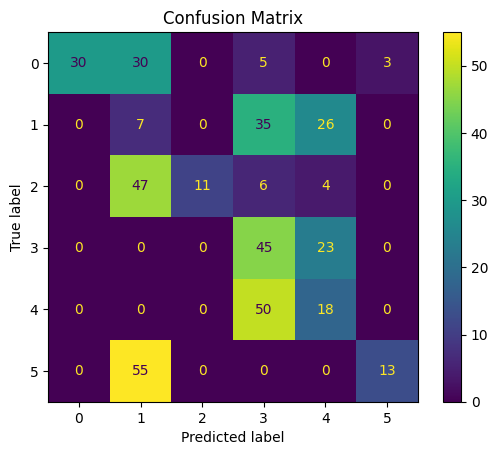

In [ ]:
# Calculate confusion matrix
cm = confusion_matrix(y_test_oversampled, y_pred, labels=grid_search.classes_)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_).plot()
plt.title("Confusion Matrix")

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [ ]:
# Define the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning (Reduced grid)
param_grid = {
    'n_estimators': [50, 100],  # Reduce the number of estimators
    'criterion': ['gini'],  # Use one criterion
    'max_depth': [None, 5],  # Use fewer depth values
    'min_samples_split': [2, 5],  # Fewer splits
    'min_samples_leaf': [1, 2],  # Fewer leaf values
}

# Option 1: Using GridSearchCV with reduced parameter grid
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

# Option 2: Alternatively, using RandomizedSearchCV (faster for large grids)
# random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=10, scoring='accuracy', cv=3, n_jobs=-1, random_state=42)

# Fit the model to the training data
grid_search_rf.fit(X_train_pca_oversampled, y_train_oversampled)
# random_search_rf.fit(X_train_pca_oversampled, y_train_oversampled)

print("Random Forest\n\n")
# Get the best hyperparameters
best_params = grid_search_rf.best_params_  # Use random_search_rf if using RandomizedSearchCV
print("Best Hyperparameters:", best_params)

best_model = grid_search_rf.best_estimator_  # Use random_search_rf if using RandomizedSearchCV

# Use the best model to predict on the test set
y_pred = best_model.predict(X_test_pca_oversampled)

# Evaluate the model on the test set
accuracy_rf = accuracy_score(y_test_oversampled, y_pred)
print(f"Accuracy on Test Set: {accuracy_rf:.4f}")

# Converting numeric labels to category names in the report
label_mapping = {
    0: 'control',
    1: 'endometrioid',
    2: 'serous',
    3: 'mucinous',
    4: 'clear cell',
    5: 'case'
}

# Replace numeric labels with category names
y_test_oversampled_category_names = [label_mapping[label] for label in y_test_oversampled]
y_pred_category_names = [label_mapping[label] for label in y_pred]

# Print classification report with category names
print("\nClassification Report:")
print(classification_report(y_test_oversampled_category_names, y_pred_category_names))

Random Forest


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy on Test Set: 0.7181

Classification Report:
              precision    recall  f1-score   support

        case       0.93      1.00      0.96        68
  clear cell       0.59      0.34      0.43        68
     control       0.94      0.90      0.92        68
endometrioid       0.40      0.60      0.48        68
    mucinous       0.86      0.62      0.72        68
      serous       0.73      0.85      0.79        68

    accuracy                           0.72       408
   macro avg       0.74      0.72      0.72       408
weighted avg       0.74      0.72      0.72       408



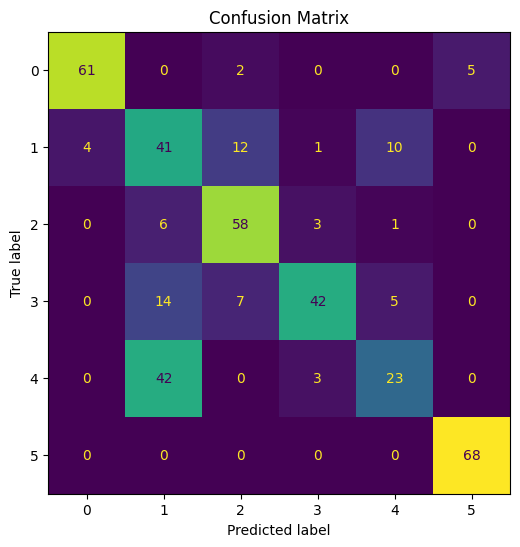

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test_oversampled, y_pred, labels=grid_search.classes_)

# Create a new figure with a custom size
plt.figure(figsize=(8, 6))

# Use ConfusionMatrixDisplay to plot the matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)

# Plot with default styling (same as in `plot()`)
disp.plot(cmap='viridis', ax=plt.gca(), colorbar=False)

# Add title
plt.title("Confusion Matrix")

# Show the plot
plt.show()

**Comparison of Models**

In [ ]:
import plotly.graph_objects as go

In [ ]:


# Update model names and accuracies
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree', 'XGBoost', 'Random Forest']
accuracies = [accuracy_logistic, accuracy_knn, accuracy_svm, accuracy_decision, accuracy_xgb,  accuracy_rf]

# Create a bar chart
fig = go.Figure()

fig.add_trace(go.Bar(
    y=accuracies,
    x=model_names,
    marker=dict(color='blue'),
    text=[f"{acc:.4f}" for acc in accuracies],  # Display accuracies formatted to 4 decimal places
    textposition='outside',
))

fig.update_layout(
    title='Model Comparison - Accuracy',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Accuracy'),
    bargap=0.5,
    height=600,
    width=800
)

fig.show()